In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT
import ctypes
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [3]:
mychain = ROOT.TChain("antiKstar")
# file_list = ["/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root"]
file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar/*.root")

# adding_file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/topo/*.root")

# for i in range(len(adding_file_list)):
    # adding_file_list[i] += '/phi_cc'

# file_list += adding_file_list
    
for i in file_list:
    mychain.Add(i)

In [4]:
file_list

['/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar/standard.root']

### topo analysis

In [5]:
file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar/*.root")
tree='antiKstar'
base_filter="D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 &&  Dstarp_CMS_p>2.5 "
base_filter+="&& gamma_E>0.45 && Pi0_Prob2>0.58 && abs(Dstarp_delM-0.1455)<0.00077 && (iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=0 && iCascDcyBrP_Dst_0!=2)"
variables=['iCascDcyBrP_Dst_0','D0_M','D0_cosHel_0']
pd_topo = get_pd(file=file_list[0], tree=tree,base_filter=base_filter,variables=variables)
n = 20
pd_topo['iCascDcyBrP_Dst_0'].value_counts()[:n].index.tolist()

[7, -1, 4, 6, 16, 14, 17, 5, 23, 9, 25, 21, 10, 20, 30, 3, 24, 12, 48, 36]

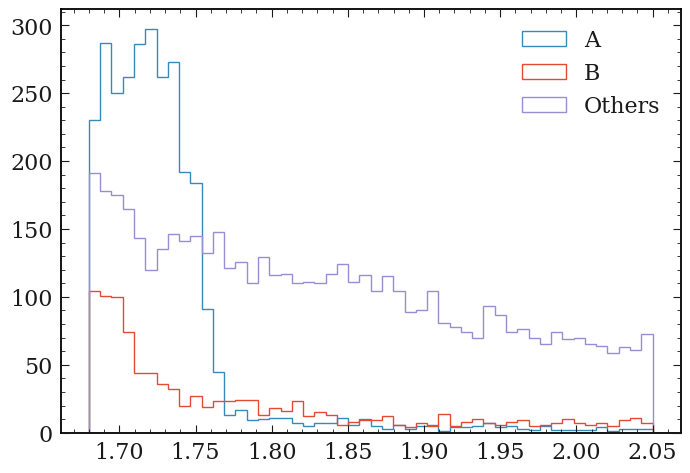

In [6]:

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7  | iCascDcyBrP_Dst_0==4').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='A')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6  | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='B')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7  & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')



plt.legend()

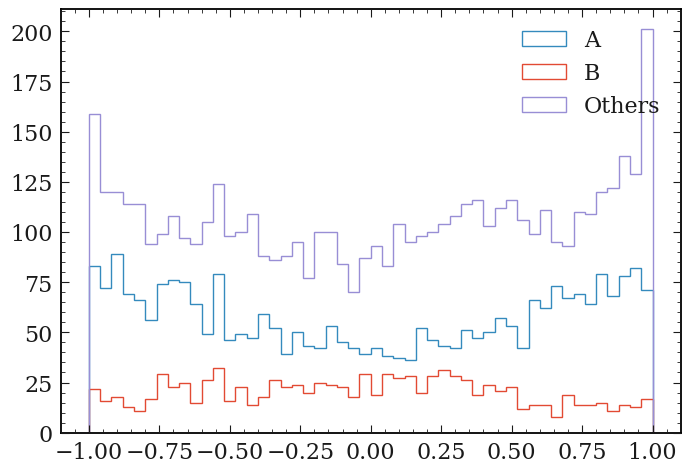

In [7]:

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7  | iCascDcyBrP_Dst_0==4').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6  | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='B')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7  & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='Others')



plt.legend()

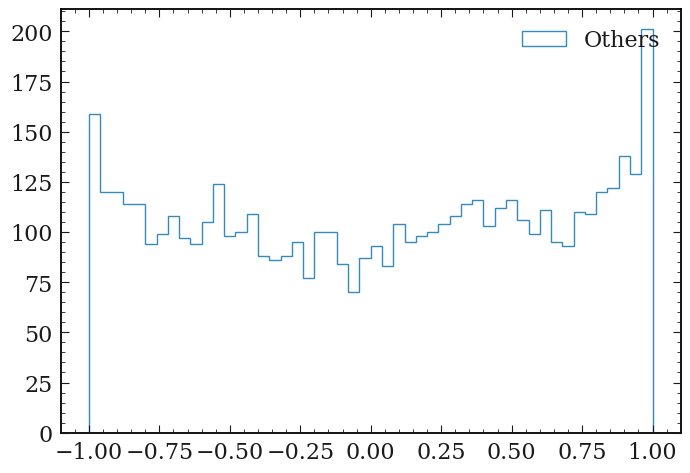

In [8]:
# 
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7 ').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==4 ').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6 ').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==5 ').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==14 ').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='A')


# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6  | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='B')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7  & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='Others')



plt.legend()

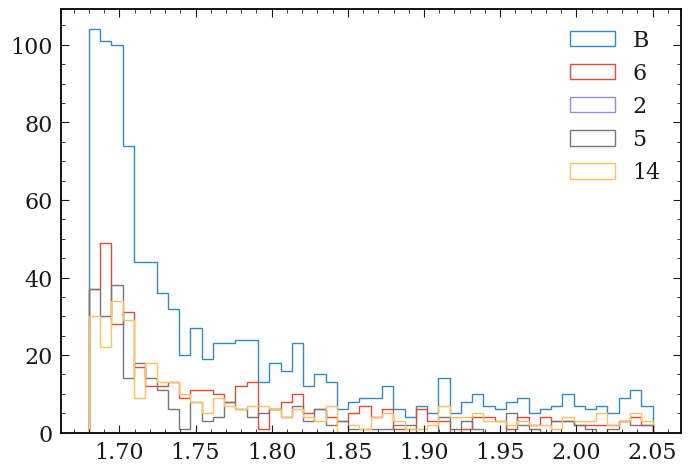

In [9]:

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7  | iCascDcyBrP_Dst_0==4').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='A')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6 | iCascDcyBrP_Dst_0==2 | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='B')

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7 & iCascDcyBrP_Dst_0!=2 & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')
plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=6)
plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==2').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=2)
plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==5').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=5)
plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=14)


plt.legend()

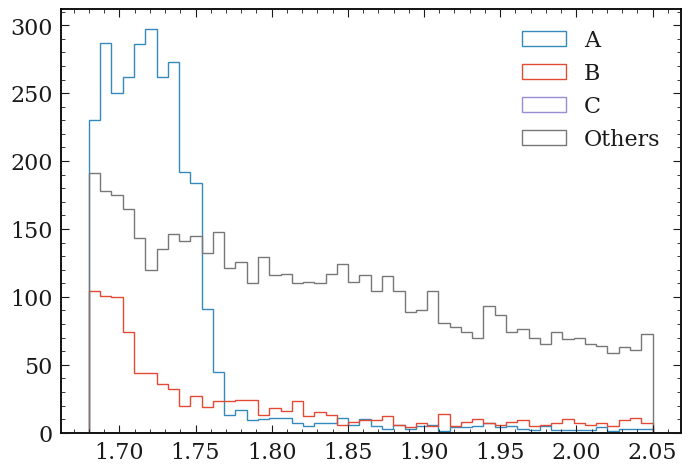

In [10]:
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=7)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==-1').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=-1)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==2').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=2)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==4').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=4)


# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=6)

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7 & iCascDcyBrP_Dst_0!=2 & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7 | iCascDcyBrP_Dst_0==2 | iCascDcyBrP_Dst_0==4 | iCascDcyBrP_Dst_0==6 | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7  | iCascDcyBrP_Dst_0==4 ').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='A')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6 | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='B')

plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==2').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='C')


plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7 & iCascDcyBrP_Dst_0!=2 & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')



# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==5').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=5)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=14)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==21').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=17)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==16').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=16)


plt.legend()

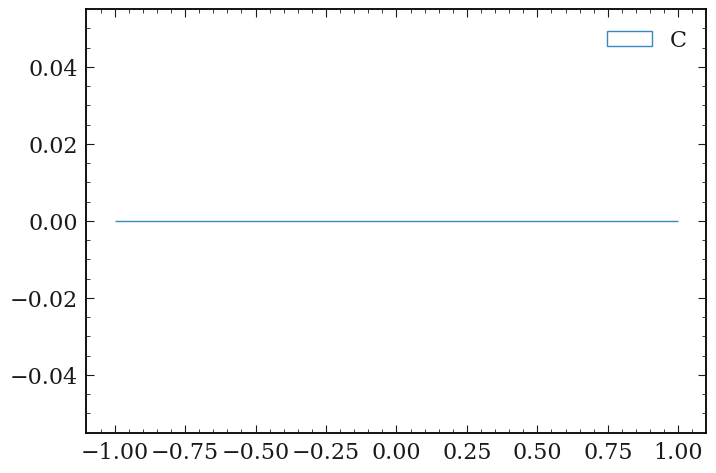

In [11]:
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=7)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==-1').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=-1)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==2').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=2)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==4').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=4)


# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==6').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=6)

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0!=7 & iCascDcyBrP_Dst_0!=2 & iCascDcyBrP_Dst_0!=4 & iCascDcyBrP_Dst_0!=6 & iCascDcyBrP_Dst_0!=5 & iCascDcyBrP_Dst_0!=14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')

# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==7 | iCascDcyBrP_Dst_0==2 | iCascDcyBrP_Dst_0==4 | iCascDcyBrP_Dst_0==6 | iCascDcyBrP_Dst_0==5 | iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label='Others')



plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==2').D0_cosHel_0, bins=np.linspace(-1,1,51), histtype='step',label='C')





# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==5').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=5)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==14').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=14)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==21').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',\
#          label=17)
# plt.hist(pd_topo.query('iCascDcyBrP_Dst_0==16').D0_M, bins=np.linspace(1.68,2.05,51), histtype='step',label=16)


plt.legend()

### Fit

In [12]:
yrange = (-1, 1)
x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.68, 2.05, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
a = ROOT.RooRealVar("antiKstar_M", "",0,10, "")
b = ROOT.RooRealVar("Dstarp_CMS_p", "",0,10, "")
c = ROOT.RooRealVar("Dstarp_isSignal", "",-10,10, "")
d = ROOT.RooRealVar("gamma_E", "",0,10, "")
e = ROOT.RooRealVar("Pi0_Prob2", "",0,10, "")
f = ROOT.RooRealVar("Dstarp_delM", "",0,10, "")
g = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",-200,200, "")

h = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",-200,200, "")

In [13]:
Cut="D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  "
# Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dst_0==7 | iCascDcyBrP_Dst_0==4)"
# Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dst_0!=1 & iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=7 & iCascDcyBrP_Dst_0!=4)"
Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dst_0!=1 & iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=2)"

# Cut=" iCascDcyBrP_Dst_0>0 && iCascDcyBrP_Dst_0<2 "

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,a,b,c,d,e,f,g), ROOT.RooFit.Import(mychain), Cut=Cut)


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)

w_1.setVal(1/4)
# w_1.setVal(1)
before_data.addColumn(w_1)
data = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data.sumEntries()
print(N_total)

2268.0
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dst_0!=1 & iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=2) claims to use the variables (D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0) but only (D0_M,antiKstar_M,Dstarp_CMS_p,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dst_0!=1 & iCascDcyBrP_Dst_0!=0 & iCascDcyBrP_Dst_0!=2)
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dst_0) TTree Int_t branch iCascDcyBrP_Dst_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #39376 because iCascDcyBrP_Dst_0 cann

In [14]:
data.Print()

RooDataSet::data[D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dst_0,weight:w_1] = 9072 entries (2268 weighted)


In [15]:
mychain2 = ROOT.TChain("antiKstar_cc")
# file_list = ["/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_preext_maxFBDT_2ndFBDT/ccbar/*.root"]
file_list = glob.glob("/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15rd/MC15rd_Vg_sigext_maxFBDT_2ndFBDT/topo/resultfile/result_antiKstar_cc/*.root")
for i in file_list:
    mychain2.Add(i)

In [16]:
Cut="D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  "
# Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dstm_0==4 | iCascDcyBrP_Dstm_0==5) "
# Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dstm_0!=0 & iCascDcyBrP_Dstm_0!=2 & iCascDcyBrP_Dstm_0!=4 & iCascDcyBrP_Dstm_0!=5) "
Cut+="& gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dstm_0!=0 & iCascDcyBrP_Dstm_0!=2  & iCascDcyBrP_Dstm_0!=3) "

# Cut="iCascDcyBrP_Dstm_0==0"
 
before_data2 = ROOT.RooDataSet("data2","", ROOT.RooArgSet(x,y,a,b,c,d,e,f,h), ROOT.RooFit.Import(mychain2), Cut=Cut)
before_data2.addColumn(w_1)
data2 = ROOT.RooDataSet(before_data2.GetName(), before_data2.GetTitle(),before_data2, before_data2.get(), '' ,  'w_1')
N_total = data2.sumEntries()
print(N_total)

2182.25
[#1] INFO:InputArguments -- The formula D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dstm_0!=0 & iCascDcyBrP_Dstm_0!=2  & iCascDcyBrP_Dstm_0!=3)  claims to use the variables (D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0) but only (D0_M,antiKstar_M,Dstarp_CMS_p,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0) seem to be in use.
  inputs:         D0_M>1.68 & D0_M<2.05 & abs(antiKstar_M - 0.89555) < 0.06 &  Dstarp_CMS_p>2.5  & gamma_E>0.45 & Pi0_Prob2>0.58 & abs(Dstarp_delM-0.1455)<0.00077 & (iCascDcyBrP_Dstm_0!=0 & iCascDcyBrP_Dstm_0!=2  & iCascDcyBrP_Dstm_0!=3) 
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(iCascDcyBrP_Dstm_0) TTree Int_t branch iCascDcyBrP_Dstm_0 will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #37493 because iCascD

In [17]:
data2.Print()

RooDataSet::data2[D0_M,D0_cosHel_0,antiKstar_M,Dstarp_CMS_p,Dstarp_isSignal,gamma_E,Pi0_Prob2,Dstarp_delM,iCascDcyBrP_Dstm_0,weight:w_1] = 8729 entries (2182.25 weighted)


In [18]:
data.append(data2)

In [19]:
data.sumEntries()

4450.25

In [20]:
fitting_region = (1.68, 2.05)
# x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# # x.setBins(40)
# l = ROOT.RooArgList(x)
# # signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [21]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.6,1.4, 1.8)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
# sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)

x_bkg2_c0 = ROOT.RooRealVar("x_bkg2_c0", "c0",0.2, -1,1)
x_bkg2_c1 = ROOT.RooRealVar("x_bkg2_c1", "c1",0.2, -1,1)

# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = RO
# ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


x_bkg3_tau = ROOT.RooRealVar("x_bkg3_tau", "tau",-2, -20,0)


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(D0_M) new range named 'fit' created with bounds [1.68,2.05]
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(model) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., 

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_topo_except_Vpi_Vg_low_resonance.png has been created


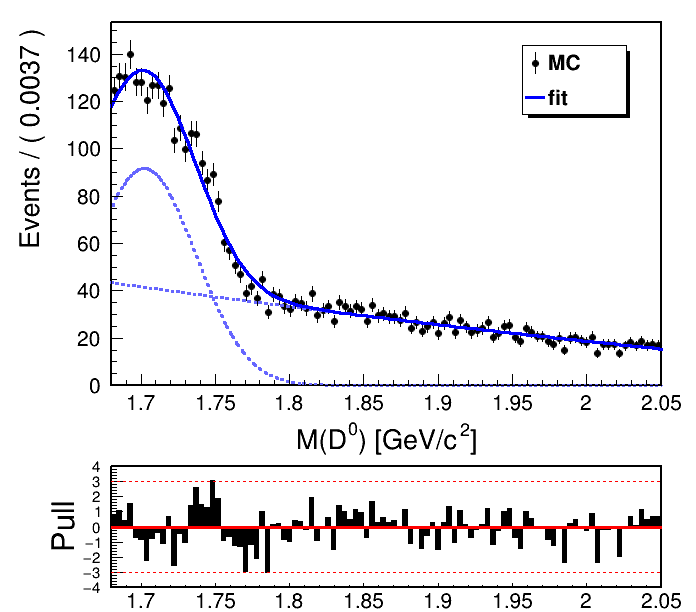

In [22]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# # sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# # # sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


# sig2 = ROOT.RooExponential("sig2", "Signal component 1", x, x_bkg3_tau) 

sig2 = ROOT.RooPolynomial("sig2", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))
sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# # model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)
model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)

# model = ROOT.RooPolynomial("model", "Signal component 1", x, ROOT.RooArgList(x_bkg2_c0, x_bkg2_c1))


r = model.fitTo(data,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
# leg1.SetBorderSize(0)

leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_topo_except_Vpi_Vg_low_resonance.png")
#canv.SaveAs("test.png")

f = ROOT.TFile("antiKstarg_MC15rd_except_Vpi0_Vg_fitresult_D0M.root", "RECREATE")
r.Write("antiKstarg")
f.Close()


In [23]:
model.Print("t")

0x55c1ef52a440 RooAddPdf::model = 0.0642201 [Auto,Dirty] 
  0x55c1ef0c7660/V- RooGaussian::sig1 = 1.382e-05 [Auto,Dirty] 
    0x55c1d7aef770/V- RooRealVar::D0_M = 1.865
    0x55c1dcaf88a0/V- RooRealVar::mean = 1.7022 +/- 0.0029888
    0x55c1dc45cbe0/V- RooRealVar::sigma1 = 0.0344135 +/- 0.00243936
  0x55c1e04a9650/V- RooRealVar::sig1frac = 0.355638 +/- 0.0166375
  0x55c1ddad5ac0/V- RooPolynomial::sig2 = 0.099657 [Auto,Dirty] 
    0x55c1d7aef770/V- RooRealVar::D0_M = 1.865
    0x55c1e1b8d100/V- RooRealVar::x_bkg2_c0 = -0.699167 +/- 0.0776431
    0x55c1dbff39e0/V- RooRealVar::x_bkg2_c1 = 0.116037 +/- 0.0351097


# cosHel

In [23]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

94610819409040

(MyPdf_xsquared) An instance of MyPdf_xsquared.


In [24]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

In [25]:
fitting_region = (-1, 1)
# y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# y.setBins(50)
# y_l = ROOT.RooArgList(y)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# y_signalhist = ROOT.RooDataHist("y_signalhist", "sighist", y_l, D0_cosHel_TH1F, 1)


In [26]:
y_mean = ROOT.RooRealVar("y_mean", "mean of gaussians", 0.5,0.4, 0.6)
y_sigma1 = ROOT.RooRealVar("y_sigma1", "width of gaussians", 0.03,0,0.2)
y_sigma2 = ROOT.RooRealVar("y_sigma2", "width of gaussians", 0.02,0,0.2)

c0 = ROOT.RooRealVar("c0", "c0",0.2, 0,1)


Cheby_c0 = ROOT.RooRealVar("Cheby_c0", "c0",0.2, -1,1)
Cheby_c1 = ROOT.RooRealVar("Cheby_c1", "c0",0.2, -1,1)
Cheby_c2 = ROOT.RooRealVar("Cheby_c2", "c0",-0.2, -1,1)


[#0] WARNING:InputArguments -- The parameter 'y_sigma1' with range [0, 0.2] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_sigma2' with range [0, 0.2] of the RooGaussian 'sig2_2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(D0_cosHel_0) new range named 'fit' created with bounds [-1,1]
[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(model) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_topo_except_Vpi0_Vg_cosHel.png has been created


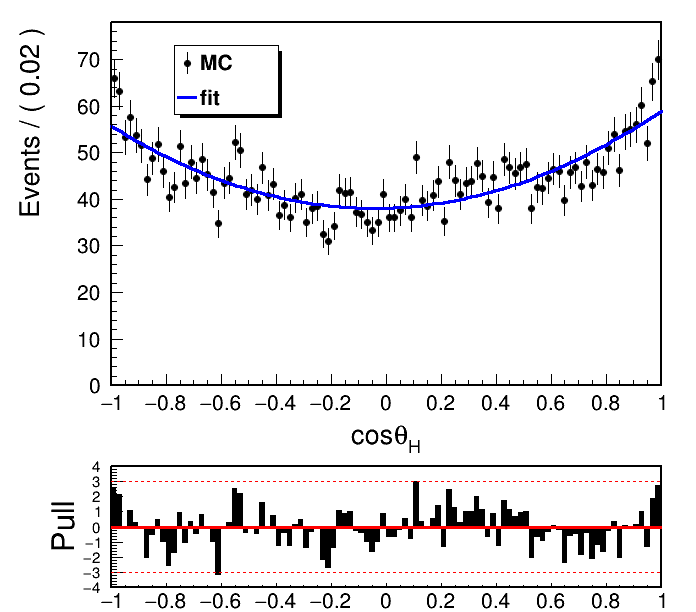

In [27]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))


# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
# model = ROOT.MyPdf_xsquared_nopara("model", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
sig1 = ROOT.MyPdf_xsquared("sig1", "y_bkg1", y, c0)


sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_mean, y_sigma1)
sig2_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_mean, y_sigma2)

frac2 = ROOT.RooRealVar("frac2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2 = ROOT.RooAddPdf("sig2", "model", [sig2_1, sig2_2], frac2)


sig3 = ROOT.RooChebychev("sig3", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

sig_model1 = ROOT.RooAddPdf("sig_model1", "model", [sig1, sig2], sig1frac)
# model = ROOT.RooAddPdf("model", "model", [sig3, sig_model1], sig2frac)


# model = ROOT.RooChebychev("model", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))
model = ROOT.RooChebychev("model", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1))


run = model.fitTo(data,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)
# run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1)

run.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = y.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
# leg1.SetBorderSize(0)

leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = y.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/MCrd_topo_except_Vpi0_Vg_cosHel.png")

f = ROOT.TFile("antiKstarg_MC15rd_except_Vpi0_Vg_fitresult_cosHel.root", "RECREATE")
run.Write("antiKstarg")
f.Close()


In [28]:
model.Print("t")


0x560c4d54b880 RooChebychev::model = 0.798667 [Auto,Dirty] 
  0x560c1e859a90/V- RooRealVar::D0_cosHel_0 = 0
  0x560c4c4765e0/V- RooRealVar::Cheby_c0 = 0.0335636 +/- 0.0254549
  0x560c4d5e2350/V- RooRealVar::Cheby_c1 = 0.201333 +/- 0.0222588
